In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [24]:
df = pd.read_csv(r'D:\Belajar\Purwadhika\JCDS10\Data Science\UJIAN\MODUL 2\Exam-Data-Analytics-Visualization-master\Employee.csv')

### PROBLEM
Mencari/Mendapatkan Karyawan baru yang cocok dengan perusahaan bukan perkara yang mudah, apalagi ada kemungkinan talenta2 yang perusahaan miliki direkrut perusahaan lain. Banyak faktor lain juga yang menyebabkan karyawan keluar atau pindah dari perusahaan.

### GOALS
Mendapatkan Analisis dari Kriteria Karyawan yang keluar dari perusahaan, sehingga perusahaan dapat maintain karyawan yang ada agar tidak keluar juga dari perusahaan. Ataupun pada proses rekrutmen bisa mempertimbangkan hal hal berikut yang masuk menjadi kategori seseorang akan keluar dari perusahaan.

In [30]:
df.head(10) # Membaca data sekilas

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [31]:
df.info() # melihat info data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [33]:
df.describe().T # melihat statistik data keseluruhan

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [37]:
df.describe(include='O').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [35]:
df[df['Attrition']=='Yes'].describe().T # membaca statistik karyawan yang keluar dari perusahaan

,count,mean,std,min,25%,50%,75%,max
Age,237.0,33.607595,9.689350,18.0,28.0,32.0,39.0,58.0
DailyRate,237.0,750.362869,401.899519,103.0,408.0,699.0,1092.0,1496.0
DistanceFromHome,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0
Education,237.0,2.839662,1.008244,1.0,2.0,3.0,4.0,5.0
EmployeeCount,237.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,237.0,1010.345992,580.750572,1.0,514.0,1017.0,1486.0,2055.0
EnvironmentSatisfaction,237.0,2.464135,1.169791,1.0,1.0,3.0,4.0,4.0
HourlyRate,237.0,65.573840,20.099958,31.0,50.0,66.0,84.0,100.0
JobInvolvement,237.0,2.518987,0.773405,1.0,2.0,3.0,3.0,4.0
JobLevel,237.0,1.637131,0.940594,1.0,1.0,1.0,2.0,5.0


In [38]:
df[df['Attrition']=='Yes'].describe(include='O').T # membaca statistik kolom categorical feature karyawan yang keluar dari perusahaan

,count,unique,top,freq
Attrition,237,1,Yes,237
BusinessTravel,237,3,Travel_Rarely,156
Department,237,3,Research & Development,133
EducationField,237,6,Life Sciences,89
Gender,237,2,Male,150
JobRole,237,9,Laboratory Technician,62
MaritalStatus,237,3,Single,120
Over18,237,1,Y,237
OverTime,237,2,Yes,127


In [27]:
df['Attrition'].value_counts(normalize=True) * 100 # melihat persentase karyawan yang kluar di banding yang tidak

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

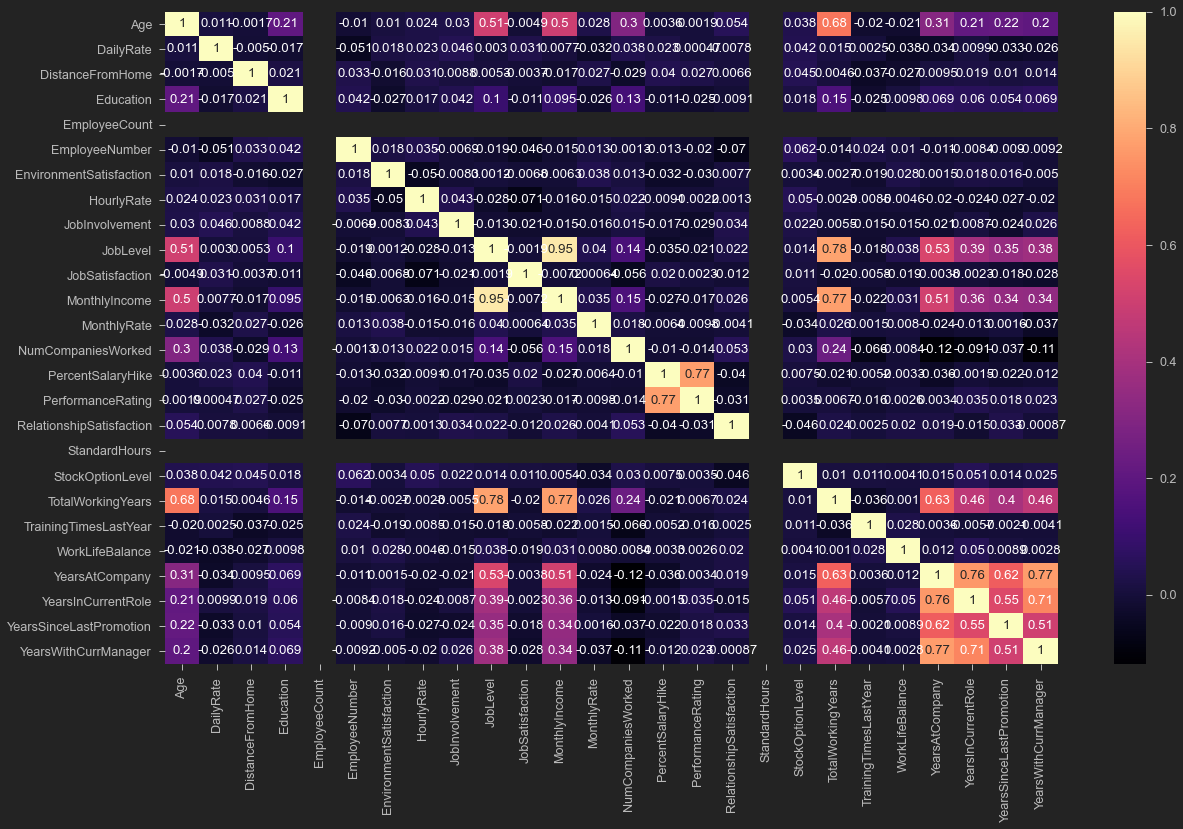

In [46]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap='magma');  
# melihat korelasi tiap numerika feature
# Nampaknya, Lama bekerja di perusahaan, Lama di jabatan yg dijabat, lama bekerja dengan manager menunjukkan korelasi positif yang cukup kuat
# Total lama bekerja dengan job level, Monthly Income dan Umur juga menujukkan korelasi positif cukup kuat
# Monthly income dan job level menunjukkan Korelasi yang kuat dan positif

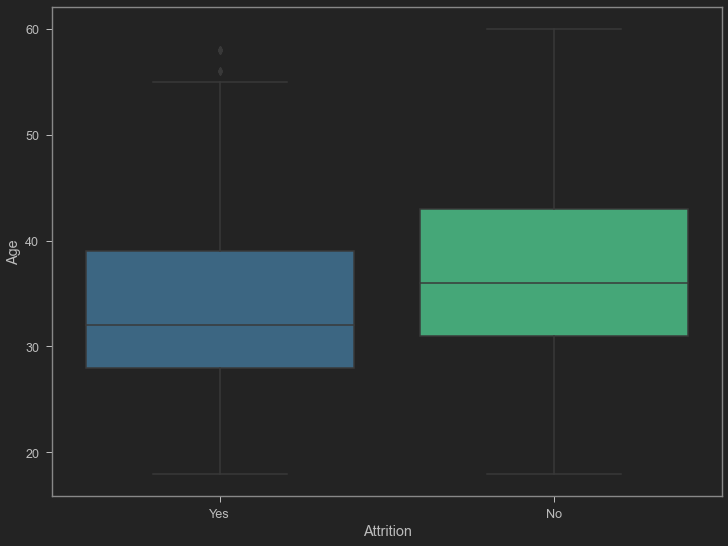

In [47]:
plt.figure(figsize=(12,9))
sns.boxplot(x = 'Attrition', y = 'Age', data = df, palette='viridis');
# ada beberapa outliers di karyawan yang keluar

In [52]:
IQR = 39 - 28.0
UpperFence= 39.0 + (1.5 * IQR)
LowerFence= 28.0 - (1.5 * IQR)
print(IQR)
print(UpperFence)
print(LowerFence)

11.0
55.5
11.5


In [53]:
df[(df['Attrition'] == 'Yes') &( df['Age'] > UpperFence)] 
# melihat data outliers, usia pensiun di perusahaan ini tidak diketahui lama bekerja di perusahaan pun beragam. kemungkinan pensiun dini

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
122,56,Yes,Travel_Rarely,441,Research & Development,14,4,Life Sciences,1,161,...,1,80,3,7,2,3,5,4,4,3
126,58,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,1,165,...,4,80,1,40,3,2,40,10,15,6
595,58,Yes,Travel_Rarely,286,Research & Development,2,4,Life Sciences,1,825,...,4,80,0,40,2,3,31,15,13,8
660,58,Yes,Travel_Frequently,781,Research & Development,2,1,Life Sciences,1,918,...,4,80,1,3,3,2,1,0,0,0
700,58,Yes,Travel_Rarely,289,Research & Development,2,3,Technical Degree,1,977,...,1,80,0,7,4,3,1,0,0,0
966,58,Yes,Travel_Rarely,601,Research & Development,7,4,Medical,1,1360,...,4,80,0,31,0,2,10,9,5,9
1354,56,Yes,Travel_Rarely,1162,Research & Development,24,2,Life Sciences,1,1907,...,4,80,0,5,3,3,4,2,1,0
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,4,80,1,14,4,1,10,9,9,8


### Numerical Feature
- Melihat data dari numerical feature dengan korelasi tertinggi

In [76]:
# df.loc[:,'EmployeeNumber':] # buat liat column yang ke hide

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [58]:
att_yes = df[df['Attrition'] =='Yes']

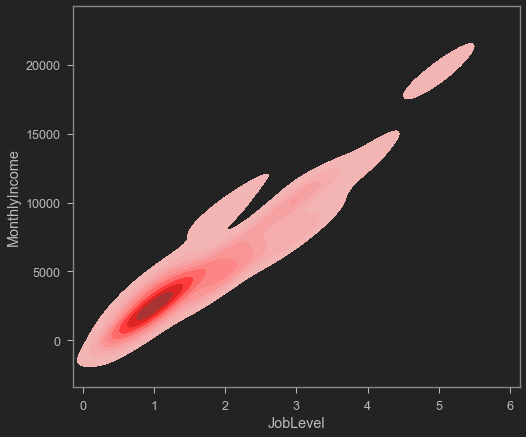

In [75]:
# Melihat distribusi karyawan yang keluar, Terlihat Karyawan yang keluar banyak di entry level dengan monthly income dibawah 5000

sns.kdeplot(x="JobLevel", y="MonthlyIncome", data=att_yes,color='red',fill=True, legend=True);
# sns.scatterplot(x=att_yes['JobLevel'],y=att_yes['MonthlyIncome'], hue = att_yes.Attrition, palette='YlOrRd')

In [93]:
# ini untuk angka jelasnya
print(pd.crosstab(index=df['JobLevel'], columns=df['Attrition']),'\n')
df.groupby('Attrition')['MonthlyIncome'].describe()

Attrition   No  Yes
JobLevel           
1          400  143
2          482   52
3          186   32
4          101    5
5           64    5 



,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,6832.739659,4818.208001,1051.0,3211.0,5204.0,8834.0,19999.0
Yes,237.0,4787.092827,3640.210367,1009.0,2373.0,3202.0,5916.0,19859.0


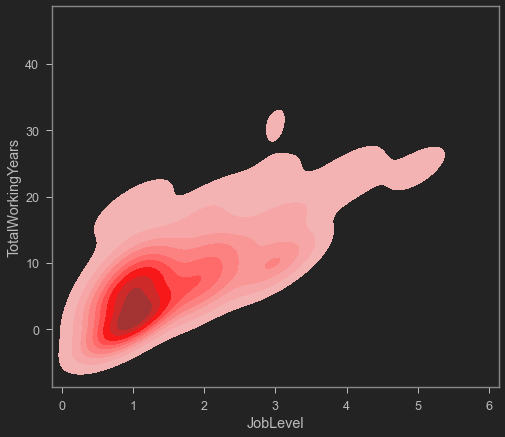

In [83]:
# melihat pesebaran data berasarkan job level dan total working years
# graph menunjukkan karyawan yang kluar kebanyakan di dibawah 10 tahun pengalaman

sns.kdeplot(x="JobLevel", y="TotalWorkingYears", data=att_yes,color='red',fill=True, legend=True);
# sns.jointplot(x = 'JobLevel', y = 'TotalWorkingYears', data = att_yes, kind='hex');

In [251]:
yes_mean_mthinc = att_yes['MonthlyIncome'].mean()
yes_mean_age = att_yes['Age'].mean()
yes_mediaan_age = att_yes['Age'].median()
print(yes_mean_age)
print(yes_mediaan_age)
# Rata- Rata umur karyawan yang keluar adalah 33 tahun mediannya 32 tahun

33.607594936708864
32.0


In [173]:
att_yes[(att_yes['MonthlyIncome'] < yes_mean_mthinc) & (att_yes['Age'] < yes_mean_age)][['Age','MonthlyIncome']].describe()
# melihat jumlah karyawan yang umurnya dibawah rata2 yang attritionnya yes dan pendapatannya dibawah rata2 karyawan yang attri nya yes juga

,Age,MonthlyIncome
count,115.000000,115.000000
mean,26.556522,2658.086957
std,4.454825,861.619829
min,18.000000,1009.000000
25%,23.000000,2195.000000
50%,28.000000,2439.000000
75%,30.000000,3007.000000
max,33.000000,4787.000000


In [153]:
att_yes_amt = df['Attrition'].value_counts()
att_yes_amt = att_yes_amt[1]
att_yes_amt

237

In [157]:
115/att_yes_amt * 100
# Jumlah persentase karyawan yang umurnya dibawah rata2 yang attritionnya yes dan pendapatannya dibawah rata2 karyawan yang attri nya yes juga dari total karyawan yang keluar sebesar 48.5%
# sedangkan sisanya 51.5% rata2 usianya di 44 tahun dengan rata2 monthly income 9386, lebih besar dibanding rata2 monthly income dari seluruh karyawan

48.52320675105485

In [172]:
att_yes[(att_yes['MonthlyIncome'] > yes_mean_mthinc) & (att_yes['Age'] > yes_mean_age)][['Age','MonthlyIncome']].describe()

,Age,MonthlyIncome
count,54.000000,54.000000
mean,44.222222,9386.240741
std,7.505135,4129.202307
min,34.000000,4834.000000
25%,37.250000,6013.250000
50%,44.000000,9224.500000
75%,50.000000,10577.250000
max,58.000000,19859.000000


In [175]:
df['MonthlyIncome'].mean()

6502.931292517007

In [158]:
att_yes.groupby('Attrition')[['YearsAtCompany','YearsInCurrentRole']].describe().T

Attrition                        Yes
YearsAtCompany     count  237.000000
                   mean     5.130802
                   std      5.949984
                   min      0.000000
                   25%      1.000000
                   50%      3.000000
                   75%      7.000000
                   max     40.000000
YearsInCurrentRole count  237.000000
                   mean     2.902954
                   std      3.174827
                   min      0.000000
                   25%      0.000000
                   50%      2.000000
                   75%      4.000000
                   max     15.000000

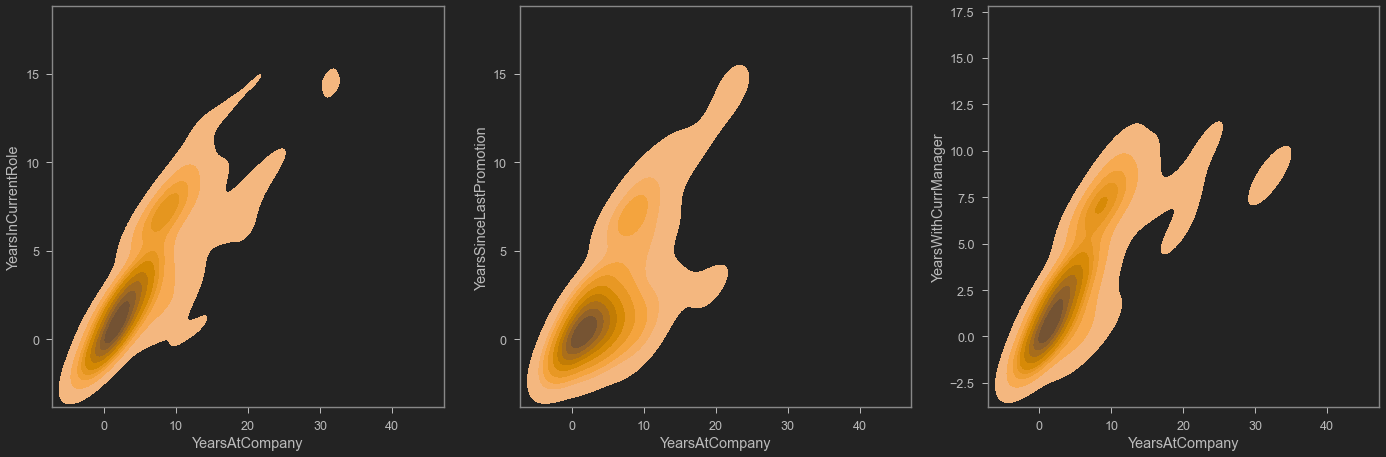

In [167]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize = (20,7))
fig.tight_layout(pad=2.8)
sns.kdeplot(x="YearsAtCompany", y="YearsInCurrentRole", data=att_yes, ax=axes[0], color='orange',fill=True, legend=True);
sns.kdeplot(x="YearsAtCompany", y="YearsSinceLastPromotion", data=att_yes, ax=axes[1], color='orange',fill=True, legend=True);
sns.kdeplot(x="YearsAtCompany", y="YearsWithCurrManager", data=att_yes, ax=axes[2], color='orange',fill=True, legend=True);

# Terlihat Pola karyawan yang keluar itu banyak di bawah 5 tahun bekerja dengan role yang sama selama dia bekerja, terakhir kali di promosi dan bekerja dengan manager yang sekarang.

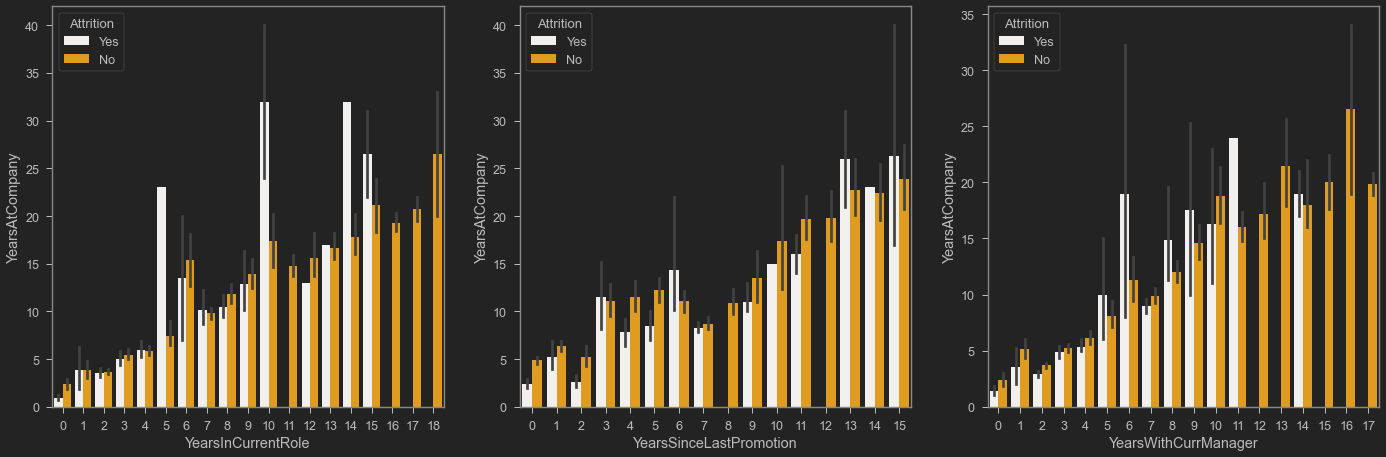

In [198]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize = (20,7))
fig.tight_layout(pad=2.8)
sns.barplot(x="YearsInCurrentRole", y="YearsAtCompany", data=df,hue='Attrition', ax=axes[0], color='orange');
sns.barplot(x="YearsSinceLastPromotion", y="YearsAtCompany", data=df,hue='Attrition', ax=axes[1], color='orange');
sns.barplot(x="YearsWithCurrManager", y="YearsAtCompany", data=df,hue='Attrition', ax=axes[2], color='orange');

# jika dilihat lagi ternyata

In [188]:
# Performa rata2 karyawan seluruh perusahaan dengan yang masih bkerja maupun yang tidak sama semua
# ini mengindikasi bahwa karyawan perusahaan performanya sudah baik, dan jika melihat bar plot diatas, karyawan yang keluar 100% itu jika jabatannya tidak berubah selama 16 tahun
# dan Terlihat juga lama bekerja dengan manager yang sama attrition rate nya  hampir 100 % jika karyawan bekerja dengan manager yang sama lebih dari 11 tahun.

df['PerformanceRating'].describe()
df[df['Attrition']=='No']['PerformanceRating'].describe()
.desatt_yes['PerformanceRating']cribe()

count    237.000000
mean       3.156118
std        0.363735
min        3.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: PerformanceRating, dtype: float64

In [208]:
att_yes[att_yes['PerformanceRating'] < att_yes['PerformanceRating'].mean()]['PerformanceRating'].describe()

count    200.0
mean       3.0
std        0.0
min        3.0
25%        3.0
50%        3.0
75%        3.0
max        3.0
Name: PerformanceRating, dtype: float64

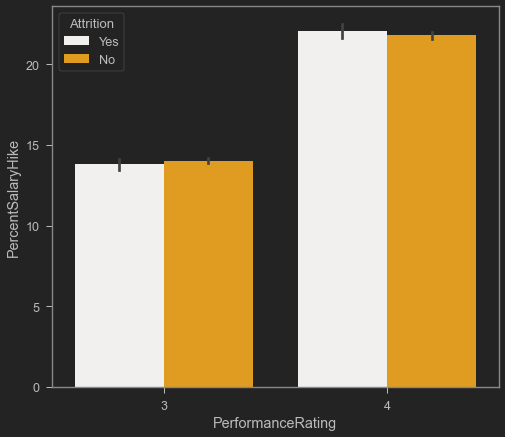

In [257]:
sns.barplot(x="PerformanceRating", y="PercentSalaryHike", data=df,hue='Attrition', color='orange');

# Performance Rating 

### Categorical Feature
- Melihat data dari Categorical feature

In [210]:
att_yes.describe(include='O').T

,count,unique,top,freq
Attrition,237,1,Yes,237
BusinessTravel,237,3,Travel_Rarely,156
Department,237,3,Research & Development,133
EducationField,237,6,Life Sciences,89
Gender,237,2,Male,150
JobRole,237,9,Laboratory Technician,62
MaritalStatus,237,3,Single,120
Over18,237,1,Y,237
OverTime,237,2,Yes,127


In [224]:
print(pd.crosstab(index=df['BusinessTravel'], columns=df['Attrition']))
(pd.crosstab(index=df['BusinessTravel'], columns=df['Attrition'],normalize='index')*100).round(2)

Attrition           No  Yes
BusinessTravel             
Non-Travel         138   12
Travel_Frequently  208   69
Travel_Rarely      887  156


Attrition,No,Yes
BusinessTravel,,
Non-Travel,92.00,8.00
Travel_Frequently,75.09,24.91
Travel_Rarely,85.04,14.96


In [222]:
print(pd.crosstab(index=df['Department'], columns=df['Attrition']))
(pd.crosstab(index=df['Department'], columns=df['Attrition'],normalize='index')*100).round(2)

Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92


Attrition,No,Yes
Department,,
Human Resources,80.95,19.05
Research & Development,86.16,13.84
Sales,79.37,20.63


In [221]:
print(pd.crosstab(index=df['Gender'], columns=df['Attrition']))
(pd.crosstab(index=df['Gender'], columns=df['Attrition'],normalize='index')*100).round(2)

Attrition   No  Yes
Gender             
Female     501   87
Male       732  150


Attrition,No,Yes
Gender,,
Female,85.20,14.80
Male,82.99,17.01


In [225]:
print(pd.crosstab(index=df['JobRole'], columns=df['Attrition']))
(pd.crosstab(index=df['JobRole'], columns=df['Attrition'],normalize='index')*100).round(2)

Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33


Attrition,No,Yes
JobRole,,
Healthcare Representative,93.13,6.87
Human Resources,76.92,23.08
Laboratory Technician,76.06,23.94
Manager,95.10,4.90
Manufacturing Director,93.10,6.90
Research Director,97.50,2.50
Research Scientist,83.90,16.10
Sales Executive,82.52,17.48
Sales Representative,60.24,39.76


In [226]:
print(pd.crosstab(index=df['MaritalStatus'], columns=df['Attrition']))
(pd.crosstab(index=df['MaritalStatus'], columns=df['Attrition'],normalize='index')*100).round(2)

Attrition       No  Yes
MaritalStatus          
Divorced       294   33
Married        589   84
Single         350  120


Attrition,No,Yes
MaritalStatus,,
Divorced,89.91,10.09
Married,87.52,12.48
Single,74.47,25.53


In [227]:
print(pd.crosstab(index=df['OverTime'], columns=df['Attrition']))
(pd.crosstab(index=df['OverTime'], columns=df['Attrition'],normalize='index')*100).round(2)

Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127


Attrition,No,Yes
OverTime,,
No,89.56,10.44
Yes,69.47,30.53


- From categorical feature, we can see that gender is not affect whether employee will resign or not
- Karyawan yang keluar 25% nya sering bisnis travel
- Department Sales & HR has around 20% rate of attrition
- 30.5% karyawan yang keluar bekerja lembur
- 26% Karyawan yang keluar, masih single


In [238]:
# Melihat crosstab turn_rate atau Attrition rate dari departemen dengan job role
(pd.crosstab(index=[df['Department'],df['JobRole']], columns=df['Attrition'],normalize='index', margins=True)*100).round(2)

Attrition                                             No    Yes
Department             JobRole                                 
Human Resources        Human Resources             76.92  23.08
                       Manager                    100.00   0.00
Research & Development Healthcare Representative   93.13   6.87
                       Laboratory Technician       76.06  23.94
                       Manager                     94.44   5.56
                       Manufacturing Director      93.10   6.90
                       Research Director           97.50   2.50
                       Research Scientist          83.90  16.10
Sales                  Manager                     94.59   5.41
                       Sales Executive             82.52  17.48
                       Sales Representative        60.24  39.76
All                                                83.88  16.12

In [263]:
(pd.crosstab(index=[df['MaritalStatus'],df['JobRole']], columns=df['Attrition'],normalize='index', margins=True)*100).round(2)

Attrition                                    No    Yes
MaritalStatus JobRole                                 
Divorced      Healthcare Representative   97.06   2.94
              Human Resources             64.29  35.71
              Laboratory Technician       78.18  21.82
              Manager                    100.00   0.00
              Manufacturing Director      97.22   2.78
              Research Director          100.00   0.00
              Research Scientist          93.55   6.45
              Sales Executive             91.30   8.70
              Sales Representative        63.64  36.36
Married       Healthcare Representative   90.16   9.84
              Human Resources             78.57  21.43
              Laboratory Technician       83.62  16.38
              Manager                     92.86   7.14
              Manufacturing Director      91.04   8.96
              Research Director           97.37   2.63
              Research Scientist          88.52  11.48
              Sales Executive             86.75  13.25
              Sales Representative        76.47  23.53
Single        Healthcare Representative   94.44   5.56
              Human Resources             90.00  10.00
              Laboratory Technician       64.77  35.23
              Manager                     95.65   4.35
              Manufacturing Director      92.86   7.14
              Research Director           94.74   5.26
              Research Scientist          73.15  26.85
              Sales Executive             70.75  29.25
              Sales Representative        44.74  55.26
All                                       83.88  16.12

In [262]:
(pd.crosstab(index=[df['OverTime'],df['JobRole']], columns=df['Attrition'],normalize='index', margins=True)*100).round(2)

Attrition                              No    Yes
OverTime JobRole                                
No       Healthcare Representative  92.55   7.45
         Human Resources            82.05  17.95
         Laboratory Technician      84.26  15.74
         Manager                    98.67   1.33
         Manufacturing Director     94.34   5.66
         Research Director          98.25   1.75
         Research Scientist         92.82   7.18
         Sales Executive            88.79  11.21
         Sales Representative       71.19  28.81
Yes      Healthcare Representative  94.59   5.41
         Human Resources            61.54  38.46
         Laboratory Technician      50.00  50.00
         Manager                    85.19  14.81
         Manufacturing Director     89.74  10.26
         Research Director          95.65   4.35
         Research Scientist         65.98  34.02
         Sales Executive            67.02  32.98
         Sales Representative       33.33  66.67
All                                 83.88  16.12

In [261]:
(pd.crosstab(index=[df['BusinessTravel'],df['JobRole']], columns=df['Attrition'],normalize='index', margins=True)*100).round(2)

Attrition                                        No    Yes
BusinessTravel    JobRole                                 
Non-Travel        Healthcare Representative   93.33   6.67
                  Human Resources            100.00   0.00
                  Laboratory Technician       92.86   7.14
                  Manager                     91.67   8.33
                  Manufacturing Director     100.00   0.00
                  Research Director          100.00   0.00
                  Research Scientist          85.71  14.29
                  Sales Executive             89.74  10.26
                  Sales Representative       100.00   0.00
Travel_Frequently Healthcare Representative   88.46  11.54
                  Human Resources             60.00  40.00
                  Laboratory Technician       68.63  31.37
                  Manager                    100.00   0.00
                  Manufacturing Director      89.66  10.34
                  Research Director          100.00   0.00
                  Research Scientist          72.22  27.78
                  Sales Executive             77.97  22.03
                  Sales Representative        34.78  65.22
Travel_Rarely     Healthcare Representative   94.44   5.56
                  Human Resources             78.95  21.05
                  Laboratory Technician       75.56  24.44
                  Manager                     94.81   5.19
                  Manufacturing Director      93.20   6.80
                  Research Director           96.77   3.23
                  Research Scientist          86.67  13.33
                  Sales Executive             82.46  17.54
                  Sales Representative        67.27  32.73
All                                           83.88  16.12

 - Job Role HR non management dengan frekuensi bisnis travel tinggi dan overtime turnover ratenya cukup tinggi
 - Begitu pula dengan job role Lab Technician, Research Scientist dan Sales Representative

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

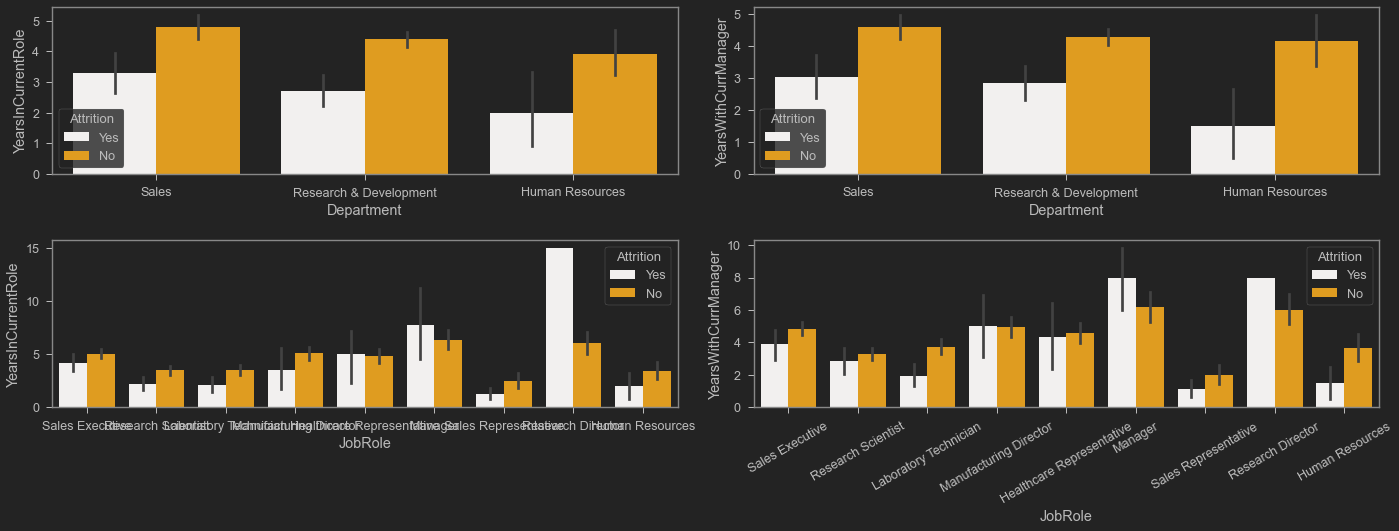

In [243]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize = (20,7))
fig.tight_layout(pad=2.8)
sns.barplot(x="Department", y="YearsInCurrentRole", data=df,hue='Attrition', ax=axes[0][0], color='orange');
sns.barplot(x="Department", y="YearsWithCurrManager", data=df,hue='Attrition', ax=axes[0][1], color='orange');
sns.barplot(x="JobRole", y="YearsInCurrentRole", data=df,hue='Attrition', ax=axes[1][0], color='orange');
plt.xticks(rotation=30)
sns.barplot(x="JobRole", y="YearsWithCurrManager", data=df,hue='Attrition', ax=axes[1][1], color='orange');
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

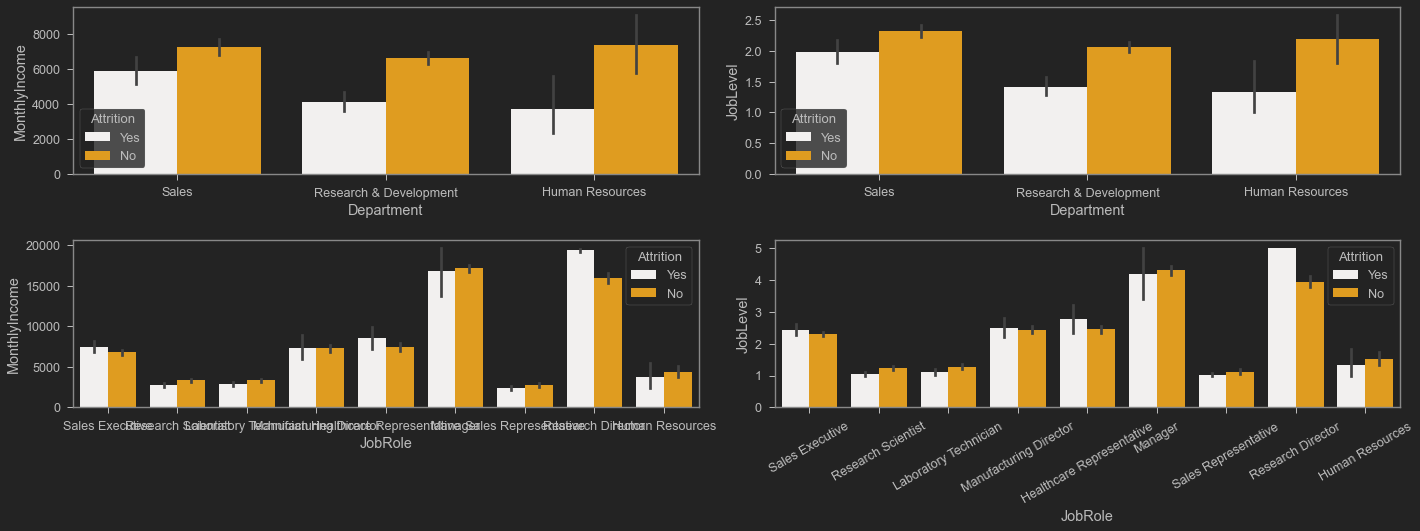

In [246]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize = (20,7))
fig.tight_layout(pad=2.8)
sns.barplot(x="Department", y="MonthlyIncome", data=df,hue='Attrition', ax=axes[0][0], color='orange');
sns.barplot(x="Department", y="JobLevel", data=df,hue='Attrition', ax=axes[0][1], color='orange');
sns.barplot(x="JobRole", y="MonthlyIncome", data=df,hue='Attrition', ax=axes[1][0], color='orange');
sns.barplot(x="JobRole", y="JobLevel", data=df,hue='Attrition', ax=axes[1][1], color='orange');
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

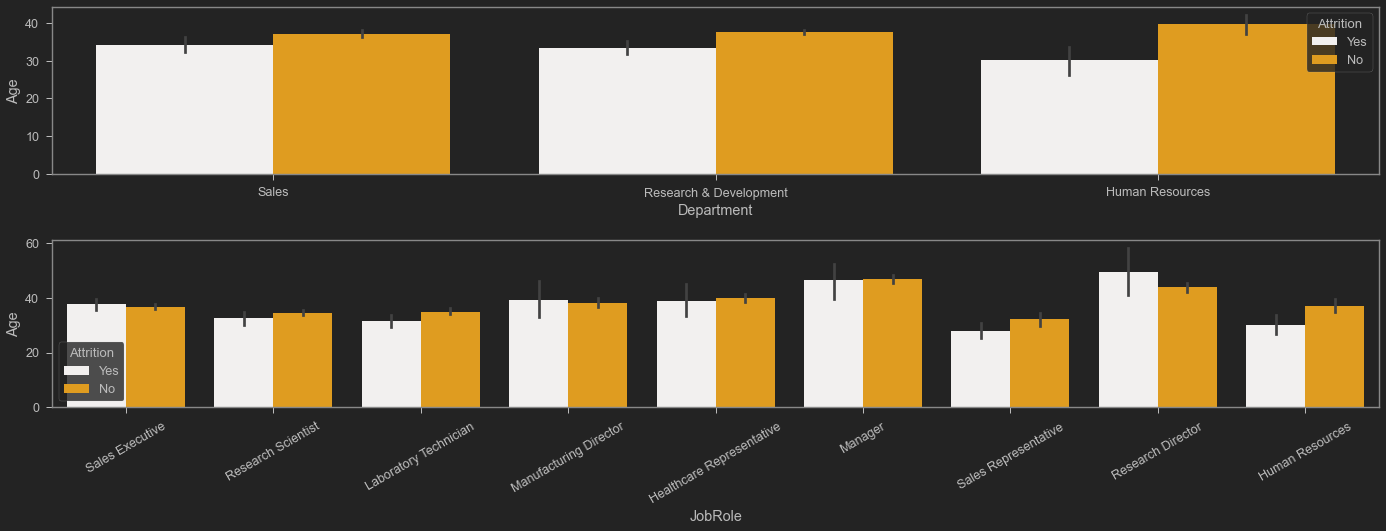

In [249]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize = (20,7))
fig.tight_layout(pad=2.8)
sns.barplot(x="Department", y="Age", data=df,hue='Attrition', ax=axes[0], color='orange');
sns.barplot(x="JobRole", y="Age", data=df,hue='Attrition', ax=axes[1], color='orange');
plt.xticks(rotation=30)

## KESIMPULAN
- Karyawan yang keluar banyak di entry level dengan monthly income dibawah 5000, karyawan yang keluar kebanyakan memiliki pengalaman bekerja dibawah 10 tahun
- Jumlah persentase karyawan yang umurnya dibawah rata2 yang attritionnya yes dan pendapatannya dibawah rata2 karyawan yang attri nya yes juga dari total karyawan yang keluar sebesar 48.5% rata2 umurnya 26 tahun, sisanya 51.5% rata2 usianya di 44 tahun dengan rata2 monthly income 9386, lebih besar dibanding rata2 monthly income dari seluruh karyawan
- Dilihat dari job levelnya, Karyawan yang resign kebanyakan yang entry level sampai Experienced individual contributors (1-5 Tahun bekerja)
- Divisi/Departemen Sales Entry level paling tinggi turnover rate nya, yang memang kita tahu sudah biasa terjadi di perusahaan manapun, diikuti dengan technician laboratory dengan 24% turnover rate
- Bagian HR pun termasuk tinggi dengan turnover rate 23%


## REKOMENDASI
- 48.5% Karyawan yang keluar terlihat usianya rata2 26 tahun dengan gaji dibawah rata2 karyawan yang keluar, dilihat dari performancenya pun tidak maka perlu adjustment gaji atau reward/penghargaan agar mereka
- 51.5% karyawan yang keluar dengan rata2 umur 44 tahun dengan gaji diatas rata2 juga memilih keluar disebabkan tidak puas dengan jabatan yang dipegang saat ini atau tidak puas dengan manajer. Sebaiknya diberi reward/penghargaan atas dedikasi yang mereka berikan agar tercipta rasa bangga dan merasa diperhatikan.
- Pada proses rekrutmen juga perlu diberitahukan bahwa pada posisi tertentu dibutuhkan frekuensi bisnis travel yang cukup tinggi dan overtime/lembur. Agar dari awal sudah dapat memfilter kandidat yang tidak bersedia